<a href="https://colab.research.google.com/github/anarosner/testing/blob/master/WiDS_Starter_Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WiDS CAMBRIGE DATATHON WORKSHOP
## Data Exploration
### February 15th, 2020
### Instructors: Weiwei Pan (Harvard IACS), Karren Dai Yang (MIT IDSS)
---

<img src="https://github.com/onefishy/wids_datathon_2020/raw/master/workshop_materials/images/inst_logos.png" alt="Harvard IACS" style="height: 80px;" align="left"/>

---

### Task: Predicting Patient Survival
 
The challenge is to create a model that uses data from the first 24 hours of intensive care to predict patient survival.

### Part I. Data exploration and preprocessing
* Exploration: understand the data in order to use it optimally
* Preprocessing: cleaning/engineer data for model development


### Part II. ML and classification algorithms

### Look at the data
* Use [Pandas](https://pandas.pydata.org/pandas-docs/stable/) package to read and display data
* Identify the columns (e.g. targets, irrelevant features, useful features) based on prior knowledge
* Identify numerical and categorical features

In [0]:
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/onefishy/wids_datathon_2020/master/workshop_materials/data/training_v2.csv') # read in the data as a DataFrame
data.head(3) # show the first 3 rows of the dataset

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.0,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,Emergency Department,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,0,95.3,NaN,122.0,703.03,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic


### Look out for features that may need to be reformatted
* Diagnosis is numerical but actually represents a categorical code

In [0]:
subset = data[['apache_2_diagnosis', 'apache_3j_diagnosis']] # get subset of data
print(subset.dtypes) # get data types
subset.head()

apache_2_diagnosis     float64
apache_3j_diagnosis    float64
dtype: object


,apache_2_diagnosis,apache_3j_diagnosis
0,113.0,502.01
1,108.0,203.01
2,122.0,703.03
3,203.0,1206.03
4,119.0,601.01


In [0]:
# recast types
data = data.astype({'apache_2_diagnosis': 'object',
                    'apache_3j_diagnosis': 'object'
                           })

### Compute basic statistics of dataset and features
* Identify sources of missing data, ranges of feature values, outliers, etc.

In [0]:
subset = data[['age', 'bmi', 'ethnicity', 'h1_bilirubin_max', 'h1_bilirubin_min']] # get subset of data
subset.describe(include = 'all') # show summary statistics

,age,bmi,ethnicity,h1_bilirubin_max,h1_bilirubin_min
count,87485.000000,88284.000000,90318,7094.000000,7094.000000
unique,NaN,NaN,6,NaN,NaN
top,NaN,NaN,Caucasian,NaN,NaN
freq,NaN,NaN,70684,NaN,NaN
mean,62.309516,29.185818,NaN,1.098612,1.097752
std,16.775119,8.275142,NaN,2.033590,2.032605
min,16.000000,14.844926,NaN,0.200000,0.200000
25%,52.000000,23.641975,NaN,0.400000,0.400000
50%,65.000000,27.654655,NaN,0.600000,0.600000
75%,75.000000,32.930206,NaN,1.100000,1.100000



 
### Visualizing the distributions of different features
* Look for biases in the data that may affect model training or deployment
* Use [matplotlib](https://matplotlib.org) package to plot data
* Example: Make bar plot of distribution of patient survival


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

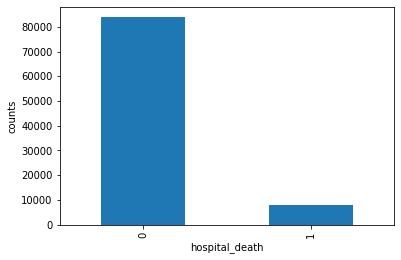

In [0]:
# make bar plot of counts
data['hospital_death'].value_counts().plot.bar() 
plt.ylabel('counts')
plt.xlabel('hospital_death')
plt.show()

* Example: Make bar plot of distribution of ethnicity

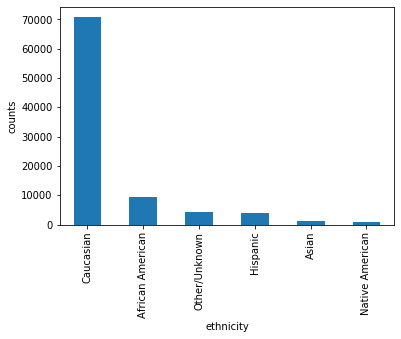

In [0]:
data['ethnicity'].value_counts().plot.bar() 
plt.ylabel('counts')
plt.xlabel('ethnicity')
plt.show()

* Example: Make histogram of distribution of age

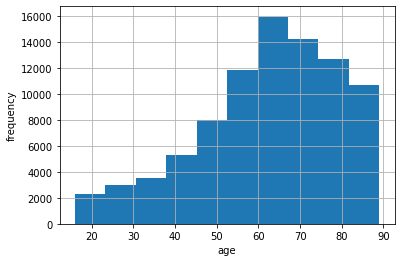

In [0]:
data['age'].hist()
plt.ylabel('frequency')
plt.xlabel('age')
plt.show()

* Example: make boxplot of age vs. survival


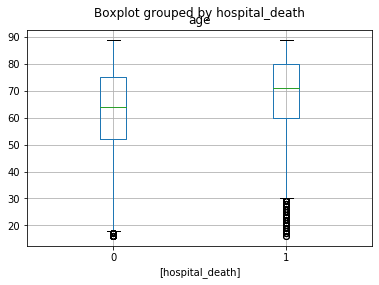

In [0]:
data.boxplot(column=['age'], by=['hospital_death'])
plt.show()

* Example: make scatterplot of diastolic vs. systolic BP


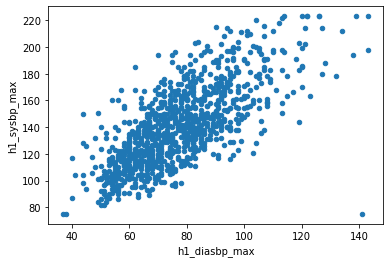

In [0]:
subset = data[['h1_diasbp_max', 'h1_sysbp_max']].loc[0:1000, :].dropna() 
#print(np.corrcoef(subset['h1_diasbp_max'], subset['h1_sysbp_max'])) # compute correlation coefficient

data.loc[0:1000, :].plot.scatter(x='h1_diasbp_max', y='h1_sysbp_max')
plt.show()

### Part I. Data exploration and preprocessing
* Exploration: understand the data in order to use it optimally


* Preprocessing: cleaning/engineer data for model development
    * Selecting features that are potentially useful for classification
    * Encoding categorical features to numerical values
    * Normalizing continuous features
    * Handling missing values (so many missing values)

### Part II. ML and classification algorithms

### Select features that are potentially useful for classification based on prior knowledge

In [0]:
features_you_want = ['hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasive_max', 'd1_mbp_invasive_min', 'd1_mbp_max', 'd1_mbp_min', 'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_invasive_max', 'd1_sysbp_invasive_min', 'd1_sysbp_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_invasive_max', 'h1_diasbp_invasive_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_invasive_max', 'h1_mbp_invasive_min', 'h1_mbp_max', 'h1_mbp_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_invasive_max', 'h1_sysbp_invasive_min', 'h1_sysbp_max', 'h1_sysbp_min', 'h1_sysbp_noninvasive_max', 'h1_sysbp_noninvasive_min', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_max', 'd1_creatinine_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_hemaglobin_max', 'd1_hemaglobin_min', 'd1_hematocrit_max', 'd1_hematocrit_min', 'd1_inr_max', 'd1_inr_min', 'd1_lactate_max', 'd1_lactate_min', 'd1_platelets_max', 'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 'd1_wbc_min', 'h1_albumin_max', 'h1_albumin_min', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min', 'h1_calcium_max', 'h1_calcium_min', 'h1_creatinine_max', 'h1_creatinine_min', 'h1_glucose_max', 'h1_glucose_min', 'h1_hco3_max', 'h1_hco3_min', 'h1_hemaglobin_max', 'h1_hemaglobin_min', 'h1_hematocrit_max', 'h1_hematocrit_min', 'h1_inr_max', 'h1_inr_min', 'h1_lactate_max', 'h1_lactate_min', 'h1_platelets_max', 'h1_platelets_min', 'h1_potassium_max', 'h1_potassium_min', 'h1_sodium_max', 'h1_sodium_min', 'h1_wbc_max', 'h1_wbc_min', 'd1_arterial_pco2_max', 'd1_arterial_pco2_min', 'd1_arterial_ph_max', 'd1_arterial_ph_min', 'd1_arterial_po2_max', 'd1_arterial_po2_min', 'd1_pao2fio2ratio_max', 'd1_pao2fio2ratio_min', 'h1_arterial_pco2_max', 'h1_arterial_pco2_min', 'h1_arterial_ph_max', 'h1_arterial_ph_min', 'h1_arterial_po2_max', 'h1_arterial_po2_min', 'h1_pao2fio2ratio_max', 'h1_pao2fio2ratio_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma', 'solid_tumor_with_metastasis', 'apache_3j_bodysystem', 'apache_2_bodysystem']

In [0]:
# select desired features
features = data[features_you_want] # select these columns of data
features.head()

,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,...,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,0,68.0,22.73,0,Caucasian,M,180.3,0.541667,0,73.9,2.3,113,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,0,77.0,27.42,0,Caucasian,F,160.0,0.927778,0,70.2,NaN,108,0,0.0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0.0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1.0,12.7,NaN,NaN,95.0,...,1.3,1.3,3.5,3.5,557.0,557.0,4.2,4.2,145.0,145.0,12.7,12.7,37.0,37.0,7.45,7.45,51.0,51.0,54.8,51.000000,37.0,37.0,7.45,7.45,51.0,51.0,51.0,51.0,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,0,25.0,31.95,0,Caucasian,F,172.7,0.000694,0,95.3,NaN,122,0,0.0,NaN,NaN,NaN,NaN,3.0,6.0,0.0,5.0,NaN,102.0,NaN,0.0,68.0,NaN,NaN,NaN,NaN,37.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,0,81.0,22.64,1,Caucasian,F,165.1,0.000694,0,61.7,NaN,203,1,0.0,NaN,NaN,NaN,0.6,4.0,6.0,0.0,5.0,185.0,114.0,25.9,1.0,60.0,30.0,30.0,142.0,7.39,4.0,NaN,34.8,NaN,1.0,8.0,62.0,30.0,48.0,...,1.6,1.1,NaN,NaN,43.0,43.0,NaN,NaN,NaN,NaN,8.8,8.8,37.0,27.0,7.44,7.34,337.0,102.0,342.5,236.666667,36.0,33.0,7.37,7.34,337.0,265.0,337.0,337.0,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,0,19.0,NaN,0,Caucasian,M,188.0,0.073611,0,NaN,NaN,119,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN,0.0,103.0,NaN,NaN,NaN,NaN,16.0,NaN,36.7,NaN,0.0,NaN,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


### Handling missing data
(Slide credit: based on slides by Usha Rengaraju)

Missing values are particularly common when working with patient data, in particular due to incomplete measurements. Handling the missing values is one of the greatest challenges faced by analysts, because the choices made can greatly affect the performance of machine learning algorithms. Here we explore some common methods for handling missing data.

* Drop missing values


In [0]:
print("Original shape before dropna()" , features.shape)
drop = features.dropna()
print("Shape after dropna()", drop.shape)

Original shape before dropna() (91713, 177)
Shape after dropna() (27, 177)


* Drop the values above a certain threshold

In [0]:
# Drop columns based on threshold limit
threshold = len(features) * 0.90
features = features.dropna(axis=1, thresh=threshold)

# New number of columns in the dataset
features.shape

(91713, 75)

* Impute (complete) missing values using  e.g. [scikit-learn](https://scikit-learn.org/stable/modules/impute.html) or [fancyimpute](https://pypi.org/project/fancyimpute/)
    * Mean/median/mode imputation
    * K-nearest neighbors imputation

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png" style="height: 300px;" align="center"/>

* Discussion: What are some pros and cons of these different approaches for handling missing data?

In [0]:
from sklearn import impute

# impute numerical values using mean
nume_features = features.select_dtypes(include=['float64'])
category_names = list(nume_features.columns)
imp = impute.SimpleImputer(strategy='median') # specify the imputer
nume_features = imp.fit_transform(nume_features)
nume_features = pd.DataFrame(nume_features, columns=category_names)
#nume_features.head()

In [0]:
# impute categorical values using most frequent
cat_features = features.select_dtypes(include=['int64','object'])
category_names = list(cat_features.columns)
imp = impute.SimpleImputer(strategy='most_frequent') # specify the imputer
cat_features = imp.fit_transform(cat_features)
cat_features = pd.DataFrame(cat_features, columns=category_names)
#cat_features.head()

### Encoding categorical features to numerical features

* Many quantitative models only accept numerical inputs, so it is typical to convert categorical features to numerical features
* Option 1: Represent categorical features as ordinal values (0 to num_categories-1)
* Option 2: Represent categorical features as binary vectors

<img src="images/onehot.png" style="height: 200px;" align="center"/>

In [0]:
# get one-hot encodings of categorical variables

one_hot_encoded = features.select_dtypes(include=['object', 'int64'])
one_hot_encoded = pd.get_dummies(one_hot_encoded)
one_hot_encoded.head()

,hospital_death,elective_surgery,readmission_status,apache_post_operative,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_F,gender_M,apache_2_diagnosis_101.0,apache_2_diagnosis_102.0,apache_2_diagnosis_103.0,apache_2_diagnosis_104.0,apache_2_diagnosis_105.0,apache_2_diagnosis_106.0,apache_2_diagnosis_107.0,apache_2_diagnosis_108.0,apache_2_diagnosis_109.0,apache_2_diagnosis_110.0,apache_2_diagnosis_112.0,apache_2_diagnosis_113.0,apache_2_diagnosis_114.0,apache_2_diagnosis_115.0,apache_2_diagnosis_116.0,apache_2_diagnosis_117.0,apache_2_diagnosis_118.0,apache_2_diagnosis_119.0,apache_2_diagnosis_120.0,apache_2_diagnosis_121.0,apache_2_diagnosis_122.0,apache_2_diagnosis_123.0,apache_2_diagnosis_124.0,apache_2_diagnosis_202.0,apache_2_diagnosis_203.0,apache_2_diagnosis_207.0,apache_2_diagnosis_208.0,apache_2_diagnosis_209.0,apache_2_diagnosis_212.0,apache_2_diagnosis_213.0,apache_2_diagnosis_214.0,apache_2_diagnosis_215.0,apache_2_diagnosis_216.0,apache_2_diagnosis_217.0,apache_2_diagnosis_218.0,apache_2_diagnosis_219.0,apache_2_diagnosis_301.0,apache_2_diagnosis_302.0,apache_2_diagnosis_303.0,apache_2_diagnosis_304.0,apache_2_diagnosis_305.0,apache_2_diagnosis_306.0,apache_2_diagnosis_307.0,apache_2_diagnosis_308.0,apache_3j_bodysystem_Cardiovascular,apache_3j_bodysystem_Gastrointestinal,apache_3j_bodysystem_Genitourinary,apache_3j_bodysystem_Gynecological,apache_3j_bodysystem_Hematological,apache_3j_bodysystem_Metabolic,apache_3j_bodysystem_Musculoskeletal/Skin,apache_3j_bodysystem_Neurological,apache_3j_bodysystem_Respiratory,apache_3j_bodysystem_Sepsis,apache_3j_bodysystem_Trauma,apache_2_bodysystem_Cardiovascular,apache_2_bodysystem_Gastrointestinal,apache_2_bodysystem_Haematologic,apache_2_bodysystem_Metabolic,apache_2_bodysystem_Neurologic,apache_2_bodysystem_Renal/Genitourinary,apache_2_bodysystem_Respiratory,apache_2_bodysystem_Trauma,apache_2_bodysystem_Undefined Diagnoses,apache_2_bodysystem_Undefined diagnoses
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


### Standardization of Numerical Features
* Many models are sensitive to the ranges of features, i.e. features with greater variability by default have greater influence over the outcome
* Option 1: normalize data to have zero-mean and unit-variance
* Option 2: rescale range of data to [0,1]

<img src="images/rescaling.png" style="height: 300px;" align="center"/>

In [0]:
from sklearn import preprocessing

# display summary statistics
nume_features.describe(include = 'all')

,age,bmi,height,pre_icu_los_days,weight,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000,91713.000000
mean,62.433548,29.128570,169.648256,0.835766,83.917765,0.027761,3.476138,5.482156,0.009421,4.015614,99.749021,0.150044,87.788100,25.840460,36.418303,0.323182,88.487390,50.161024,88.592250,50.239846,102.997405,70.319758,104.644979,64.869768,104.548679,64.926357,28.870673,12.846925,99.244589,90.460436,148.335689,96.922268,148.210515,96.982190,37.279786,36.271726,75.301059,62.805077,75.661204,63.168787,92.161384,83.613108,91.531364,79.329212,91.436230,79.639059,22.556006,17.153969,98.088232,95.211987,133.158909,116.308659,132.810180,116.425589,173.078015,113.913600,0.083599,0.041879,0.000850,0.015570,0.223436,0.012888,0.025961,0.007011,0.004100,0.020477
std,16.393595,8.124165,10.716719,2.487756,24.645926,0.164287,0.944878,1.277178,0.096603,1.550540,30.725221,0.357117,41.860607,15.006459,0.814807,0.467694,19.780844,13.305602,19.681933,13.265685,22.000078,17.102447,20.783790,15.660920,20.536165,15.574637,10.681113,5.054311,1.791501,10.012275,25.711127,20.660033,25.648712,20.589027,0.684994,0.735936,18.044243,16.037959,17.732555,15.754051,21.492597,19.971061,20.010250,18.643002,19.513464,18.260219,7.342588,5.932187,3.145098,6.474594,27.012570,25.984842,26.561786,25.539242,84.112920,37.085108,0.236826,0.207821,0.029151,0.123806,0.416551,0.112792,0.159021,0.083438,0.063898,0.141626
min,16.000000,14.844926,137.200000,-24.947222,38.600000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,0.000000,46.000000,13.000000,46.000000,13.000000,58.000000,0.000000,60.000000,22.000000,60.000000,22.000000,14.000000,0.000000,0.000000,0.000000,90.000000,41.000000,90.000000,41.030000,35.100000,31.889000,37.000000,22.000000,37.000000,22.000000,46.000000,36.000000,49.000000,32.000000,49.000000,32.000000,10.000000,0.000000,0.000000,0.000000,75.000000,53.000000,75.000000,53.000000,73.000000,33.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,23.787760,162.560000,0.035417,67.300000,0.000000,3.000000,6.000000,0.000000,4.000000,87.000000,0.000000,54.000000,11.00000

In [0]:
# scale features
category_names = list(nume_features.columns)
nume_features = preprocessing.scale(nume_features) # rescale features
nume_features = pd.DataFrame(nume_features, columns=category_names)
nume_features.describe(include = 'all')

,age,bmi,height,pre_icu_los_days,weight,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04,9.171300e+04
mean,4.708470e-16,-7.963190e-16,8.263997e-17,9.498361e-16,-7.839194e-16,1.052900e-14,1.364853e-14,-2.271305e-14,2.812668e-14,4.803335e-15,-8.717948e-16,6.066186e-14,1.275716e-16,6.325820e-15,-1.393847e-15,-2.312099e-14,1.930231e-16,2.182726e-15,-1.288398e-15,-1.666309e-15,1.434856e-14,-5.607541e-16,6.825027e-18,2.061357e-16,-1.428803e-15,2.393178e-15,3.132429e-14,5.718448e-16,6.906347e-15,-7.147210e-16,-4.171910e-16,-1.028210e-15,1.821307e-15,1.840845e-15,-2.541899e-15,-2.967446e-15,-3.901596e-16,-1.303262e-14,4.825892e-16,9.720432e-15,1.184514e-16,-2.819246e-16,-7.295250e-16,4.430368e-15,-1.364248e-15,-2.653275e-15,-8.012217e-16,3.339300e-16,3.262506e-15,3.620261e-15,3.709716e-15,8.920449e-16,-5.087168e-15,1.194946e-15,9.193087e-16,-5.446004e-16,-7.005459e-17,2.922468e-15,2.727162e-15,-2.971552e-14,-6.914314e-15,9.631456e-15,-4.293059e-14,1.950584e-15,-4.033110e-15,-3.439167e-15
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-2.832436e+00,-1.758177e+00,-3.027833e+00,-1.036401e+01,-1.838763e+00,-1.689768e-01,-2.620603e+00,-3.509442e+00,-9.752070e-02,-1.944890e+00,-2.270103e+00,-4.201568e-01,-1.141607e+00,-1.455412e+00,-5.299813e+00,-6.910154e-01,-2.147918e+00,-2.792901e+00,-2.164040e+00,-2.807247e+00,-2.045341e+00,-4.111701e+00,-2.1480

In [0]:
# combine one-hot encoded categorical features with normalized numerical features
features = one_hot_encoded.join(nume_features)

# use the preprocessed data in the next stages!
